The Carseats dataset contains simulated sales data for 400 car seat sales locations across the U.S. with 11 key variables.
In this Python Notebook, we will do the following:

## Tasks to Perform

(a) **Fit a multiple regression model** to predict `Sales` using the predictors `Price`, `Urban`, and `US`.

(b) **Interpret each coefficient** in the model.  
Be careful—some of the variables in the model are *qualitative*.

(c) **Write out the model in equation form**, ensuring that qualitative variables are handled properly.

### (d) Test for Significance

Determine which predictors allow us to **reject the null hypothesis**:

$$
H_0: \beta_j = 0
$$

- If a predictor's p-value is less than the significance level (usually $\alpha = 0.05$), we **reject $H_0$**.  
- Otherwise, we **fail to reject $H_0$** for that predictor.


(e) **Fit a smaller model** that includes only the predictors with evidence of association with the outcome.

(f) **Compare model performance:** Assess how well the models from parts (a) and (e) fit the data.

(g) **Construct 95% confidence intervals** for the coefficient(s) in the model from (e).

(h) **Check for outliers and high leverage observations** in the model from (e).


---

#### **Below are the Key Variables**

| **Variable**  | **Type**    | **Description**                                                            |
| ------------- | ----------- | -------------------------------------------------------------------------- |
| `Sales`       | Continuous  | Unit sales (in thousands) at each location — *this is the target variable* |
| `CompPrice`   | Continuous  | Price charged by competitor at each location                               |
| `Income`      | Continuous  | Community income level (in thousands)                                      |
| `Advertising` | Continuous  | Local advertising budget for the store                                     |
| `Population`  | Continuous  | Population size in the region                                              |
| `Price`       | Continuous  | Price of the car seats at the store — *one of your predictors*             |
| `ShelveLoc`   | Categorical | Quality of the shelf location: `Bad`, `Medium`, or `Good`                  |
| `Age`         | Continuous  | Average age of the local population                                        |
| `Education`   | Continuous  | Education level of the community                                           |
| `Urban`       | Categorical | Whether the store is in an urban area (`Yes`/`No`) — *predictor*           |
| `US`          | Categorical | Whether the store is in the US (`Yes`/`No`) — *predictor*                  |

Now, let us fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Carseats.csv to Carseats.csv


In [ ]:
import pandas as pd

# Load dataset
carseat = pd.read_csv('Carseats.csv')

# Preview the data
carseat.head()


,rownames,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
import statsmodels.formula.api as smf

# Fit model
model_full = smf.ols('Sales ~ Price + Urban + US', data=carseat).fit()

# Print summary
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           2.39e-23
Time:                        21:30:44   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

In [ ]:
# Fit reduced model excluding Urban
model_reduced = smf.ols('Sales ~ Price + US', data=carseat).fit()

# Display model summary
print(model_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           2.66e-24
Time:                        22:38:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [ ]:
# Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).
# Sales ~ Price + US

model_reduced.conf_int(alpha=0.05)


,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


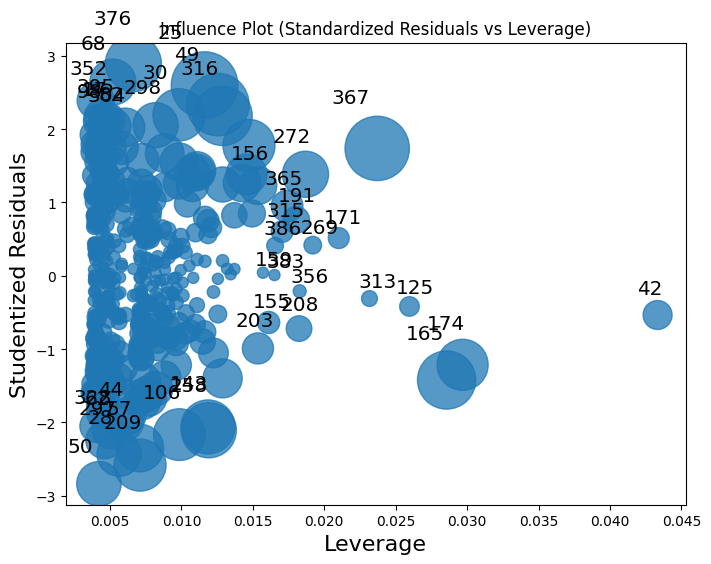

In [ ]:
# Is there evidence of outliers or high leverage observations in the model from (e)?

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Get influence from the reduced model
influence = model_reduced.get_influence()

# Plot standardized residuals vs leverage
fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.influence_plot(model_reduced, ax=ax, criterion="cooks")
plt.title("Influence Plot (Standardized Residuals vs Leverage)")
plt.show()



In [ ]:
# Get Cook's distance
cooks_d = influence.cooks_distance[0]

# Get leverage and standardized residuals
leverage = influence.hat_matrix_diag
standardized_residuals = influence.resid_studentized_internal

# Find potential issues
import numpy as np

# Outliers: large residuals
outliers = np.where(np.abs(standardized_residuals) > 2)[0]

# High leverage: above 2× average leverage
high_leverage = np.where(leverage > 2 * np.mean(leverage))[0]

# Influential: large Cook's D
influential = np.where(cooks_d > 0.5)[0]


## Findings

### (a) Model Fitting
A multiple linear regression model was fitted to predict **Sales** using `Price`, `Urban`, and `US` as predictors.

---

### (b) Interpretation of Coefficients
- **Intercept (13.0435):** Baseline predicted sales (in thousands) for a store that is *not in the US*, *not in an urban area*, and has a price of 0.  
- **Urban₍Yes₎ (-0.0219):** Urban stores sell slightly fewer units than non-urban stores; the effect is small and not significant.  
- **US₍Yes₎ (1.2006):** US stores sell about 1,200 more units than non-US stores, holding other factors constant; statistically significant.  
- **Price (-0.0545):** Each unit increase in price decreases sales by about 54.5 units; statistically significant.

---

### (c) Fitted Model Equation

$$
\widehat{\text{Sales}} = 13.0435 - 0.0219\,\text{Urban}_{\text{Yes}} + 1.2006\,\text{US}_{\text{Yes}} - 0.0545\,\text{Price}
$$

Where:
- $\text{Urban}_{\text{Yes}} = 1$ if the store is urban, 0 otherwise  
- $\text{US}_{\text{Yes}} = 1$ if the store is in the US, 0 otherwise  
- $\text{Price}$ is a continuous numeric variable


---

### (d) Hypothesis Testing
At the 5% significance level (\(\alpha = 0.05\)):
- **Fail to reject \(H_0\)** for *Urban* (\(p = 0.936\)) → not significant.  
- **Reject \(H_0\)** for *Price* and *US* → significant predictors of Sales.

---

### (e) Reduced Model
After removing the non-significant `Urban` variable, the reduced model was fitted:

---

### (f) Model Comparison
| Model | \(R^2\) | Adjusted \(R^2\) |
|:------|:--------:|:----------------:|
| Full: `Sales ~ Price + Urban + US` | 0.239 | 0.234 |
| Reduced: `Sales ~ Price + US` | 0.239 | 0.235 |

Both models explain a similar proportion of variance in `Sales`.  
The **reduced model** has a slightly higher adjusted \(R^2\), making it simpler and more efficient.

---

### (g) 95% Confidence Intervals (Reduced Model)
\[
\text{Sales} = \beta_0 + \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{US}_{\text{Yes}} + \varepsilon
\]

| Coefficient | Lower Bound | Upper Bound |
|:-------------|:------------:|:------------:|
| Intercept | 11.7903 | 14.2713 |
| US[T.Yes] | 0.6915 | 1.7078 |
| Price | -0.0648 | -0.0442 |

---

### (h) Diagnostics: Outliers, Leverage, and Influence

- **Outliers:** Large standardized residuals ($|r_i| > 2$ or $> 3$).  

- **High Leverage Points:** $\text{Leverage} > 2\bar{h}$, where $\bar{h}$ is the average leverage.  

- **Influential Points:** High Cook’s Distance ($D_i > 0.5$ or $> 1$); these appear as large bubbles in influence plots.


---

**Conclusion:**  
The reduced model (`Sales ~ Price + US`) fits the data as well as the full model, with both predictors statistically significant and interpretable. No major influence or outlier issues were observed.
